<a href="https://colab.research.google.com/github/ArixCrest/Personality-prediction/blob/main/Personality_prediction_depending_on_social_media_posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Preprocessing and Visualization

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv/mbti_1.csv')

In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
print(df.shape)

(8675, 2)


Plotting

In [ ]:
unq_vals = []
unq_tags = []
for i in df['type'].unique():
  unq_vals.append(len(df[df['type']==i]))
  unq_tags.append(i)

In [ ]:
tags = [x for _,x in sorted(zip(unq_vals,unq_tags))]

In [ ]:
vals = [x for x in sorted(unq_vals)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


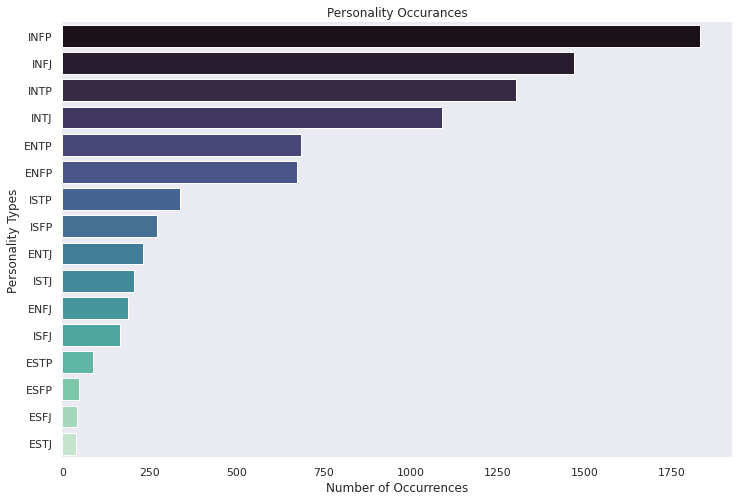

In [ ]:
sns.set(style = 'darkgrid',rc={'figure.figsize':(12,8)})
ax = sns.barplot(vals[::-1],tags[::-1],palette ='mako' )
ax.xaxis.grid(False)
ax.set(xlabel="Number of Occurrences")
ax.set(ylabel="Personality Types")
ax.set(title="Personality Occurances")
sns.despine(trim=True, left=True, bottom=True)
plt.savefig('freq.png')

Removing all the links

In [ ]:
pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
df['posts'] = df['posts'].replace(to_replace = pattern, value = ' ', regex = True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,type,posts
0,INFJ,' ||| |||enfp and intj moments sportscente...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,"'Good one _____ |||Of course, to which I s..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
import re

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

removing the Noise

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords

lem = WordNetLemmatizer() 
for i in range(0,len(df)):
  post = re.sub('[^a-zA-Z]', ' ',str(df.posts.iloc[i]))
  post = post.lower()
  post = post.split()
  stop_wrds = set(stopwords.words('english'))
  post = [lem.lemmatize(word, "v") for word in post if not word in stop_wrds]
  post = ' '.join(post)
  df['posts'][i] = post

In [ ]:
df.head(5)

,type,posts
0,INFJ,enfp intj moments sportscenter top ten play pr...
1,ENTP,find lack post alarm sex bore position often e...
2,INTP,good one course say know bless curse absolutel...
3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,ENTJ,fire another silly misconception approach logi...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer

obj = TfidfVectorizer()
obj.fit(df['posts'])
transformed_features = obj.transform(df['posts'])


In [ ]:
print(transformed_features.shape)

(8675, 85754)


In [ ]:
df['type'] = pd.Categorical(df['type'])
df['type'] = df['type'].cat.codes

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(transformed_features,df['type'],test_size = 0.2,shuffle = True,random_state = 55)

#Testing on default parameters

Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvm = LinearSVC(loss='hinge', penalty='l2',C = 1.0,max_iter=500).fit(xtrain,ytrain)

In [ ]:
preds = lsvm.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score as acc
print(acc(ytest,preds))

0.6662824207492796


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
preds = DTC.predict(xtest)

In [ ]:
print(acc(ytest,preds))

0.4680115273775216


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(xtrain,ytrain)
preds = MNB.predict(xtest)

In [ ]:
print(acc(ytest,preds))

0.21440922190201728


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(xtrain,ytrain)
preds = RFC.predict(xtest)

In [ ]:
print(acc(ytest,preds))

0.4


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(xtrain,ytrain)
preds = ADA.predict(xtest)

In [ ]:
print(acc(ytest,preds))

0.3314121037463977


In [ ]:
!pip install XGBoost

In [ ]:
import xgboost as xgb
XGB_clf = xgb.XGBClassifier()
XGB_clf.fit(xtrain,ytrain)
preds = XGB_clf.predict(xtrain)

In [ ]:
preds = XGB_clf.predict(xtest)

In [ ]:
#Computationally expensive
print(acc(ytest,preds))

0.6576368876080692


In [ ]:
from sklearn import svm
RBF_svm = svm.SVC()
RBF_svm.fit(xtrain,ytrain)
preds = RBF_svm.predict(xtest)
print("The Accuracy for RBF Svm is :",acc(ytest,preds))

The Accuracy for RBF Svm is : 0.6126801152737752


#Grid Search

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit,RandomizedSearchCV,GridSearchCV
clf = LinearSVC(loss='hinge', penalty='l2',max_iter=500)
params = {
    'C' : [i*0.5 for i in range(2,11,2)],
}
rs_lsvm = GridSearchCV(clf, params,
                        cv=3,
                        verbose=2,
                        n_jobs=-1,
                        scoring='accuracy')
rs_lsvm.fit(xtrain,ytrain)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=LinearSVC(loss='hinge', max_iter=500), n_jobs=-1,
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0]}, scoring='accuracy',
             verbose=2)

In [ ]:
print(rs_lsvm.best_params_)

{'C': 1.0}


In [ ]:
clf = DecisionTreeClassifier()
params = {
    'max_depth' : [i*2 for i in range(2,10)]
    
}
rs_dtc = GridSearchCV(clf, params,
                        cv=3,
                        verbose=2,
                        n_jobs=-1,
                        scoring='accuracy')
rs_dtc.fit(xtrain,ytrain)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16, 18]},
             scoring='accuracy', verbose=2)

In [ ]:
print(rs_dtc.best_params_)

{'max_depth': 12}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth = 12)
DTC.fit(xtrain,ytrain)
preds = DTC.predict(xtest)
print(acc(ytest,preds))

0.5014409221902018


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
params = {
    'max_depth' : [i*2 for i in range(4,20)]
    
}
rs_rfc = GridSearchCV(clf, params,
                        cv=3,
                        verbose=2,
                        n_jobs=-1,
                        scoring='accuracy')
rs_rfc.fit(xtrain,ytrain)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18, 20, 22, 24, 26,
                                       28, 30, 32, 34, 36, 38]},
             scoring='accuracy', verbose=2)

In [ ]:
print(rs_rfc.best_params_)

{'max_depth': 36}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth = 36)
RFC.fit(xtrain,ytrain)
preds = RFC.predict(xtest)
print(acc(ytest,preds))

0.38155619596541784


#FInal Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('Tfidf', TfidfVectorizer()), ('lsvm', LinearSVC(loss='hinge', penalty='l2',C = 1.0,max_iter=500))])

In [ ]:
pipe.fit(df['posts'],df['type'])

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('lsvm', LinearSVC(loss='hinge', max_iter=500))])

In [ ]:
preds = pipe.predict(df['posts'])

In [ ]:
print("Final Accuracy on training data is :",acc(df['type'],preds))

Final Accuracy on training data is : 0.9520461095100865
